In [ ]:
#%tensorflow_version 1.x
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string


def load_doc(filename):
	file = open(filename, 'r')
	text = file.read()
	file.close()
	return text

def clean_doc(doc):
	tokens = doc.split()
	table = str.maketrans('', '', string.punctuation)
	tokens = [w.translate(table) for w in tokens]
	tokens = [word for word in tokens if word.isalpha()]
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	tokens = [word for word in tokens if len(word) > 1]
	return tokens

#filename = '/content/drive/My Drive/enotion_dataset_new11/angry/t0000.txt'
#text = load_doc(filename)
#tokens = clean_doc(text)
#print(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from string import punctuation
from os import listdir
from collections import Counter

def add_doc_to_vocab(filename, vocab):
	doc = load_doc(filename)
	tokens = clean_doc(doc)
	vocab.update(tokens)
 
def process_docs(directory, vocab, is_trian):
	for filename in listdir(directory):
		if is_trian and filename.startswith('v'):
			continue
		if not is_trian and not filename.startswith('v'):
			continue
		path = directory + '/' + filename
		add_doc_to_vocab(path, vocab)
 
vocab = Counter()
process_docs('/content/drive/My Drive/enotion_dataset_new11/angry', vocab, True)
print("done")
process_docs('/content/drive/My Drive/enotion_dataset_new11/happy', vocab, True)
print("done")
process_docs('/content/drive/My Drive/enotion_dataset_new11/neutral', vocab, True)
print("done")
process_docs('/content/drive/My Drive/enotion_dataset_new11/sad', vocab, True)
print("done")

print(len(vocab))
print(vocab.most_common(50))

done
done
done
done
22802
[('movie', 2177), ('The', 1223), ('like', 811), ('This', 701), ('one', 675), ('sad', 585), ('film', 447), ('people', 420), ('would', 415), ('objective', 404), ('good', 387), ('time', 386), ('It', 382), ('merry', 380), ('made', 379), ('He', 373), ('ordinary', 371), ('see', 345), ('even', 344), ('really', 340), ('depressed', 319), ('happy', 314), ('make', 309), ('man', 308), ('much', 306), ('watch', 302), ('great', 295), ('unhappy', 295), ('dont', 294), ('best', 293), ('think', 285), ('contented', 285), ('ever', 282), ('love', 280), ('cheerful', 280), ('know', 275), ('trailer', 274), ('In', 272), ('provoked', 261), ('life', 261), ('movies', 261), ('get', 258), ('seen', 253), ('Im', 248), ('laughter', 246), ('way', 238), ('watched', 238), ('could', 233), ('still', 231), ('never', 229)]


In [ ]:
min_occurane = 2
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(len(tokens))

10985


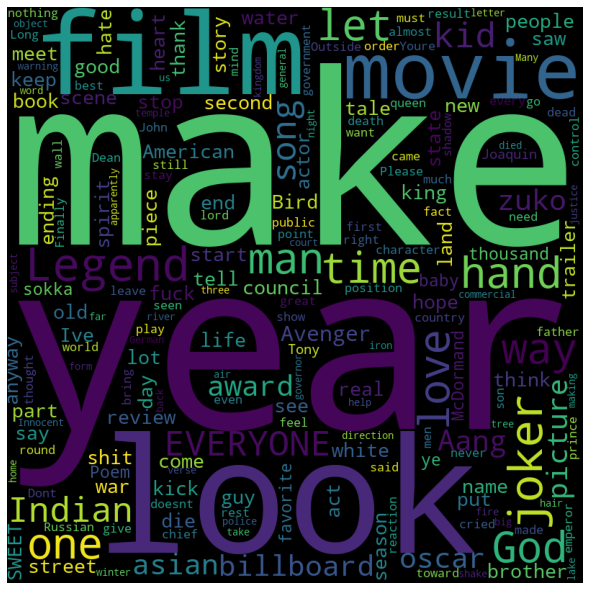

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ""
stopwords = set(STOPWORDS)
comment_words += " ".join(tokens)+" "
#print(comment_words)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [ ]:
def save_list(lines, filename):
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()
 
save_list(tokens, 'vocab.txt')

In [ ]:
from string import punctuation
from os import listdir
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, model_from_json
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [ ]:
def load_doc(filename):
	file = open(filename, 'r')
	text = file.read()
	file.close()
	return text

def clean_doc(doc, vocab):
	tokens = doc.split()
	table = str.maketrans('', '', punctuation)
	tokens = [w.translate(table) for w in tokens]
	tokens = [w for w in tokens if w in vocab]
	tokens = ' '.join(tokens)
	return tokens

def process_docs(directory, vocab, is_trian):
	documents = list()
	for filename in listdir(directory):
		if is_trian and filename.startswith('v'):
			continue
		if not is_trian and not filename.startswith('v'):
			continue
		path = directory + '/' + filename
		doc = load_doc(path)
		tokens = clean_doc(doc, vocab)
		documents.append(tokens)
	return documents

vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

angry_docs = process_docs('/content/drive/My Drive/enotion_dataset_new11/angry', vocab, True)
happy_docs = process_docs('/content/drive/My Drive/enotion_dataset_new11/happy', vocab, True)
neutral_docs = process_docs('/content/drive/My Drive/enotion_dataset_new11/neutral', vocab, True)
sad_docs = process_docs('/content/drive/My Drive/enotion_dataset_new11/sad', vocab, True)
train_docs = angry_docs + happy_docs + neutral_docs + sad_docs

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_docs)

encoded_docs = tokenizer.texts_to_sequences(train_docs)
max_length = max([len(s.split()) for s in train_docs])
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
ytrain = array([0 for _ in range(2495)] + [1 for _ in range(2688)] + [2 for _ in range(2693)] + [3 for _ in range(2480)])

angry_docs = process_docs('/content/drive/My Drive/enotion_dataset_new11/angry', vocab, False)
happy_docs = process_docs('/content/drive/My Drive/enotion_dataset_new11/happy', vocab, False)
neutral_docs = process_docs('/content/drive/My Drive/enotion_dataset_new11/neutral', vocab, False)
sad_docs = process_docs('/content/drive/My Drive/enotion_dataset_new11/sad', vocab, False)
test_docs = angry_docs + happy_docs + neutral_docs + sad_docs

encoded_docs = tokenizer.texts_to_sequences(test_docs)

Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

ytest = array([0 for _ in range(831)] + [1 for _ in range(896)] + [2 for _ in range(897)] + [3 for _ in range(828)])

vocab_size = len(tokenizer.word_index) + 1

print(ytrain)

[0 0 0 ... 3 3 3]


In [ ]:
print(max_length)
print(vocab_size)

167
9661


In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(4, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 167, 100)          966100    
_________________________________________________________________
conv1d (Conv1D)              (None, 163, 128)          64128     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 81, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 10368)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               5308928   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2052      
Total params: 6,341,208
Trainable params: 6,341,208
Non-trainable params: 0
______________________________________________

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(Xtrain, ytrain, epochs=10, verbose=2)

Epoch 1/10
324/324 - 29s - loss: 0.7929 - accuracy: 0.6516
Epoch 2/10
324/324 - 28s - loss: 0.3013 - accuracy: 0.8947
Epoch 3/10
324/324 - 29s - loss: 0.1716 - accuracy: 0.9444
Epoch 4/10
324/324 - 29s - loss: 0.1046 - accuracy: 0.9664
Epoch 5/10
324/324 - 29s - loss: 0.0701 - accuracy: 0.9769
Epoch 6/10
324/324 - 29s - loss: 0.0523 - accuracy: 0.9811
Epoch 7/10
324/324 - 29s - loss: 0.0407 - accuracy: 0.9820
Epoch 8/10
324/324 - 29s - loss: 0.0334 - accuracy: 0.9839
Epoch 9/10
324/324 - 29s - loss: 0.0317 - accuracy: 0.9841
Epoch 10/10
324/324 - 29s - loss: 0.0317 - accuracy: 0.9837


In [ ]:
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 84.878331


In [ ]:
classes = ["angry","happy","neutral","sad"]

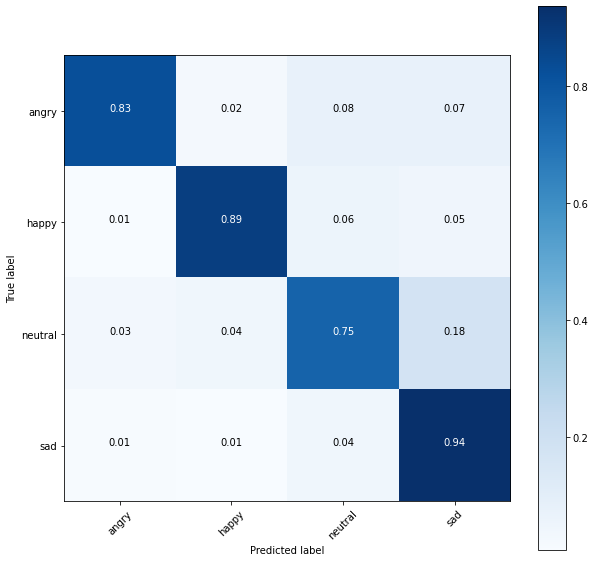

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import itertools

y_pred = model.predict(Xtest)
y_pred_class = np.argmax(y_pred,axis=1)

cnf_matrix = confusion_matrix(ytest, y_pred_class)
def plot_confusion_matrix(cm, labels, normalize = True, cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  plt.imshow(cm, cmap=plt.cm.Blues)
  plt.colorbar()
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
     plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, labels=classes)

#print(cnf_matrix)

In [ ]:
print(classification_report(ytest, y_pred_class, target_names=classes))

              precision    recall  f1-score   support

       angry       0.93      0.83      0.88       831
       happy       0.93      0.89      0.91       896
     neutral       0.82      0.75      0.78       897
         sad       0.75      0.94      0.83       828

    accuracy                           0.85      3452
   macro avg       0.86      0.85      0.85      3452
weighted avg       0.86      0.85      0.85      3452



In [ ]:
#text = ["I am not happy with this movie"]
text = ['this looks stupid.', "I am unhappy with this movie", 'disgusting movie', 'fucking bad movie', 'worst of all time', 'very emoional movie, i got tears']

In [ ]:
from keras.preprocessing import sequence
sequences_test = tokenizer.texts_to_sequences(text)
#data_int_t = pad_sequences(sequences_test, padding='pre', maxlen=(max_length-5))
data_test = pad_sequences(sequences_test, padding='post', maxlen=(max_length))
y_prob = model.predict(data_test)
for n, prediction in enumerate(y_prob):
    pred = y_prob.argmax(axis=-1)[n]
    print(text[n],"\nPrediction:",classes[pred],"\n")

this looks stupid. 
Prediction: angry 

I am unhappy with this movie 
Prediction: sad 

disgusting movie 
Prediction: angry 

fucking bad movie 
Prediction: angry 

worst of all time 
Prediction: angry 

very emoional movie, i got tears 
Prediction: sad 



In [ ]:

!pip install gTTS
from gtts import gTTS 
from IPython.display import Audio 
 
predtext = 'The emotion of sentence is ' + classes[pred]
language = 'en'

tts = gTTS(text=predtext, lang=language)
tts.save("emotion.mp3") 

Audio("emotion.mp3", autoplay=True) 